In [95]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import skimage.measure as ms

In [102]:
def contar(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, bianria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    # _, bianria = cv2.threshold(img_gris, 200, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

    borde, _ = cv2.findContours(bianria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)

    return cont

In [101]:
def etiquetar(image):
    img_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, img_binarizada = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    # _, img_binarizada = cv2.threshold(img_gris, 200, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

    contorno, _ = cv2.findContours(img_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_et = np.zeros_like(img_gris, dtype=np.uint8)

    for i, contornin in enumerate(contorno):
        cv2.drawContours(img_et, [contornin], -1, (i + 1), -1)
        
    return img_et

Text(0.5, 1.0, 'Contados: 57240')

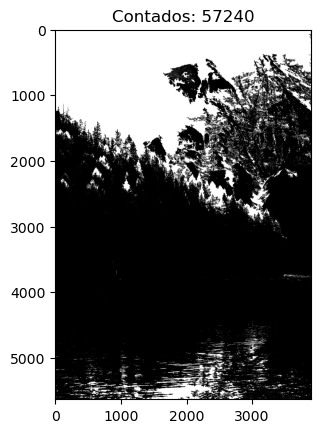

In [103]:
img = cv2.imread('..//img/sipo.jpg')

img_cont = contar(img)

img = etiquetar(img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.title('Contados: ' + str(img_cont))

Text(0.5, 1.0, 'Contados: 61805')

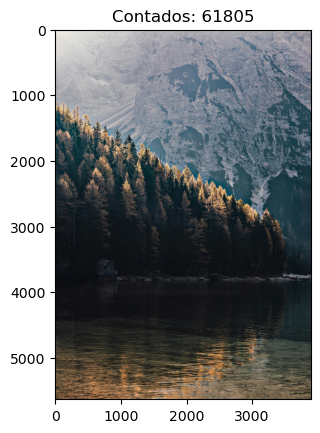

In [97]:
def contarConScikit(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    etiquetar = ms.label(binaria, connectivity=2)
    
    cont = np.max(etiquetar)

    return cont







img = cv2.imread('..//img/sipo.jpg')
img_cont1 = contarConScikit(img)
_, binaria = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img_fin = ms.measure.label(binaria, connectivity=2)






plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contados: ' + str(img_cont))





img = cv2.imread('..//img/sipo.jpg')



img_cont = contar(img)
img = etiquetar(img)


plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('SciKit: &{}')
plt.imshow(img_fin, cmap='jet')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen etiquetada')
plt.imshow(img_fin, cmap='jet')
plt.axis('off')

plt.tight_layout()
plt.show()